<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2016/17</h2>
<h3>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h3>
<hr>
</center>

<center> 
# Alfabeto 

<h4>Federico Cinus</h4>


"Alfabeto" prende un file txt in input, crea una rete i cui nodi sono le lettere dell'alfabeto e i link vengono creati solo tra lettere vicine nella stessa parola; e.g. nella parola "alfabeto" i link saranno tra (a,l), (l,f), (f,a) etc. Se due lettere risultano vicine più di una volta all'interno del file txt, il peso del loro link corrispondente verrà aumentato di una unità.

Lo scopo è quello di studiare le reti corrispondenti a diversi testi in lingue differenti e osservando la posizione dei nodi e link determinata dal loro peso tramite la funzione spring_layout.

In [240]:
#librerie da importare
%pylab inline 
import string
import networkx as nx
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [252]:
#file txt in input
f = open('Testo_italiano.txt', 'r')
#f = open('Testo_inglese.txt', 'r')
fh = f.readlines()

lista = []
for n_line in range(len(fh)):
    punctuation='!?,.:;"\')(_-{}[]1234567890*+/'
    line = fh[n_line].translate(None, punctuation).replace('\xc3\xb9','u').replace('\xc3\xa8', 'e').replace('\u00E9', 'e').replace('\xc3\xb2','o').replace('\u00F4', 'o').replace('\xc3\xa0', 'a').replace('\n',' ').replace('\n\n',' ').replace('\xc3\xac', 'i').replace('\xc3\xa9', 'e').lower()
    for word in line:
        for letter in word:
            lista.append(letter)

In [253]:
#creazione rete
G=nx.Graph()
alfabeto = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
G.add_nodes_from(alfabeto)

In [254]:
#creazione link
for i in range(len(lista)-1):
    if G.edges().count((lista[i],lista[i+1])) == 0:
        G.add_edge(lista[i],lista[i+1], weight=1)
    else:
        G[lista[i]][lista[i+1]]['weight'] += 1 
for j in alfabeto:
    if G.edges().count(('', j)) != 0:
        G.remove_edge('', j)
if g.nodes().count(' ') != 0:
    G.remove_node(' ')

Il testo è in italiano


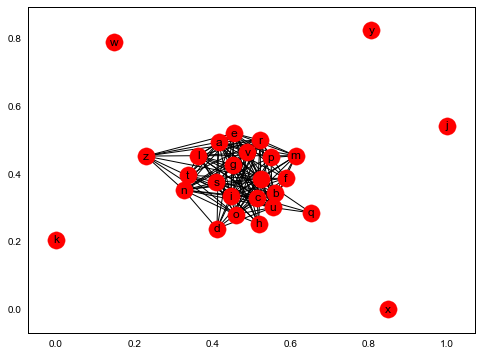

In [256]:
#visualizzazione grafica della rete
pos = nx.spring_layout(G, dim=2, k=None, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plt.figure(figsize=(8,6))
nx.draw_networkx(G,pos)


#classificazione
if len(G.edges('w'))<=3 and len(G.edges('x'))<=3 and len(G.edges('y'))<=5 and len(G.edges('j'))<=5:
    print 'Il testo è in italiano'
else:
    print 'Il testo è in inglese'

In [282]:
import powerlaw as pwl
degree = np.array(G.degree().values())
fit_function = pwl.Fit(degree)
fit_function.power_law.alpha

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


10.486586404168516

In [283]:
nx.average_clustering(G)

0.626610718715982

In [284]:
print float(sum(nx.triangles(G).values()))/3

443.0


In [288]:
nx.number_connected_components(G)

6

In [289]:
nx.degree_assortativity_coefficient(G)

-0.31074958351482063

array([[ 114.,  130.,  145., ...,  142.,  141.,  140.],
       [ 114.,  130.,  145., ...,  142.,  141.,  140.],
       [ 114.,  130.,  145., ...,  142.,  141.,  140.],
       ..., 
       [ 114.,  130.,  145., ...,  142.,  141.,  140.],
       [ 114.,  130.,  145., ...,  142.,  141.,  140.],
       [ 114.,  130.,  145., ...,  142.,  141.,  140.]])

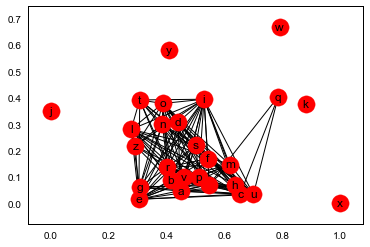

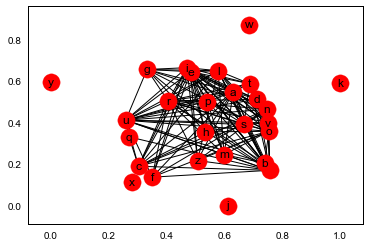

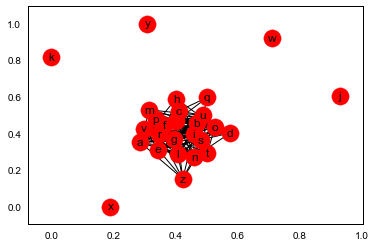

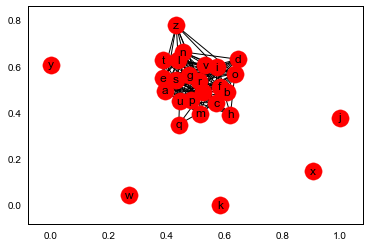

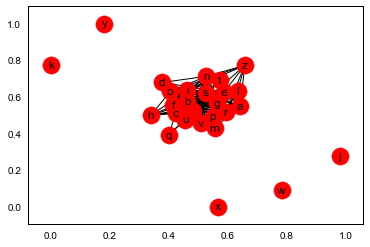

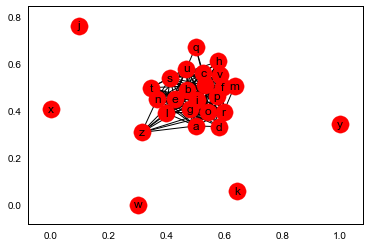

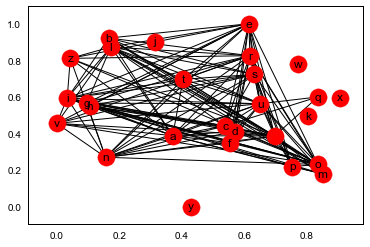

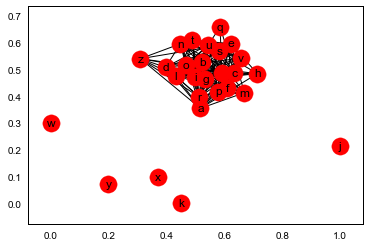

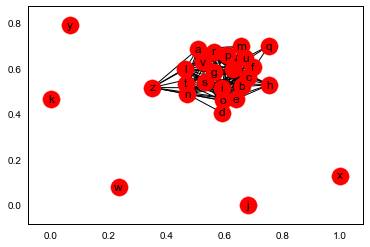

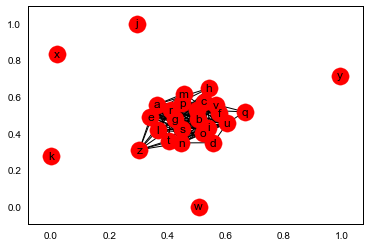

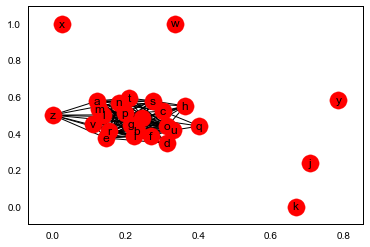

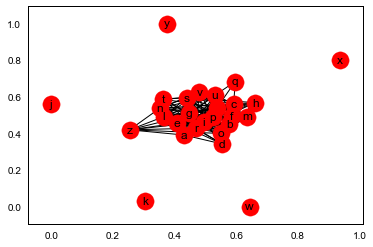

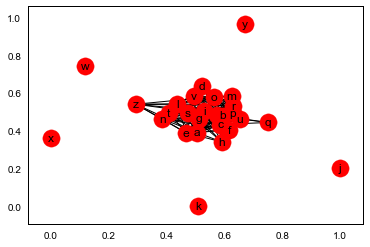

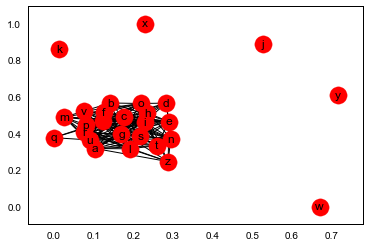

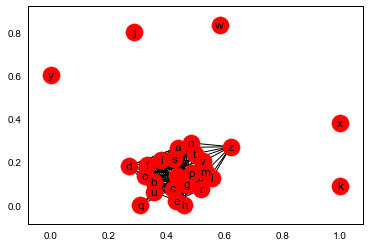

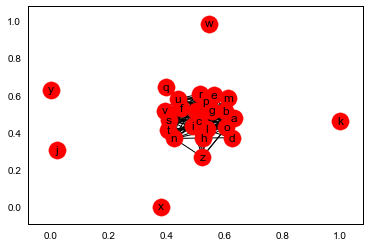

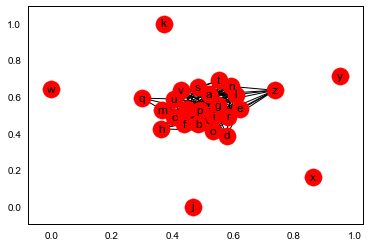

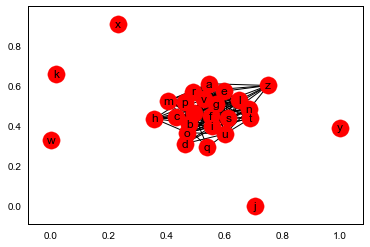

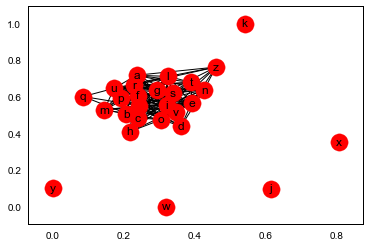

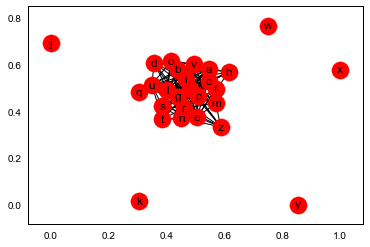

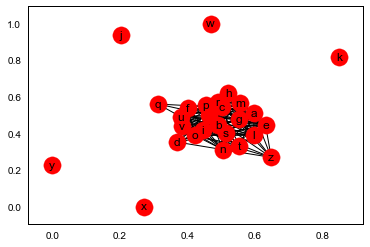

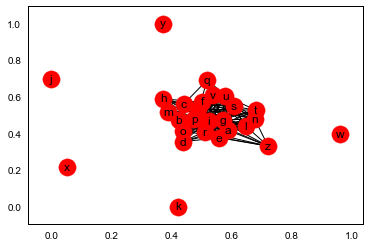

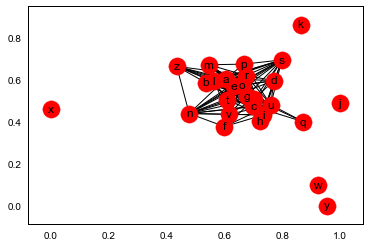

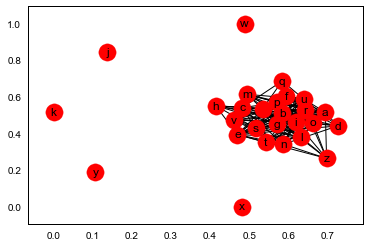

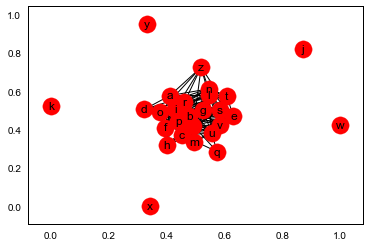

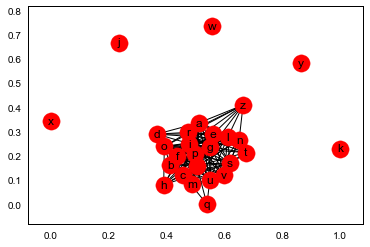

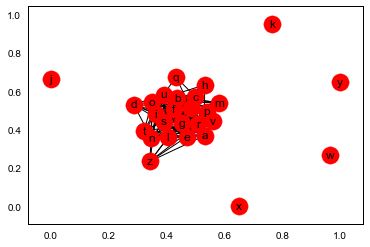

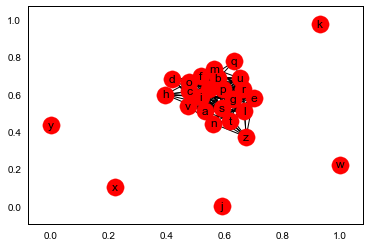

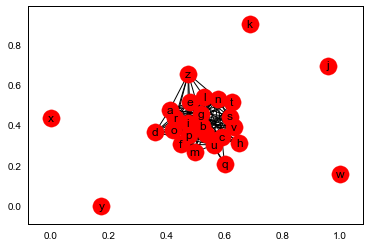

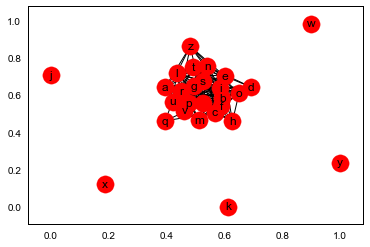

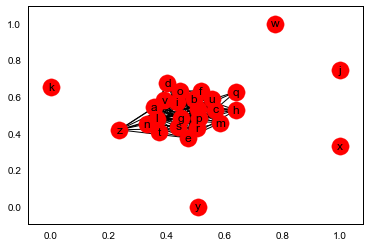

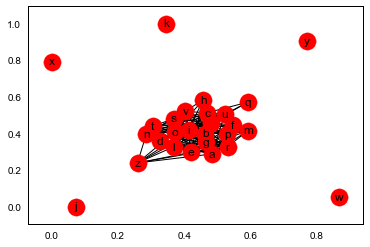

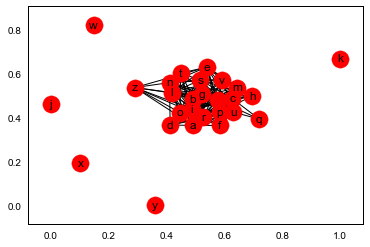

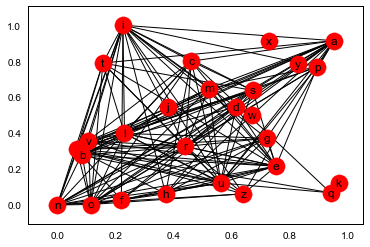

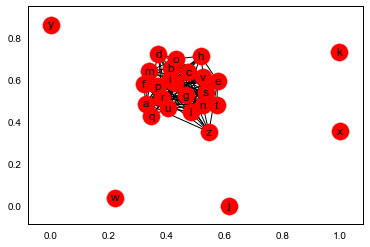

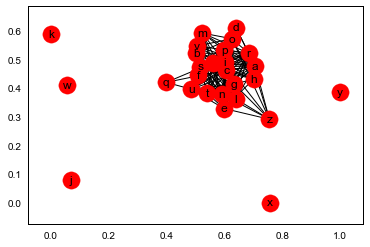

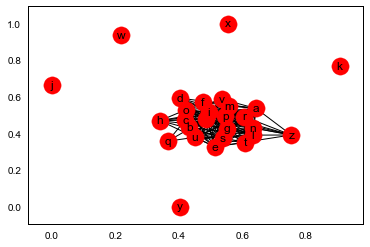

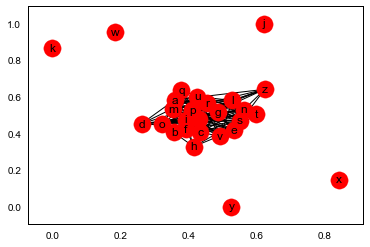

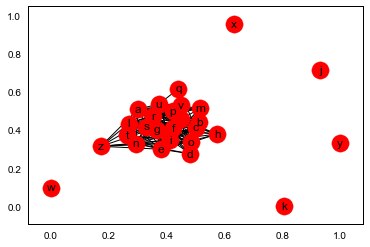

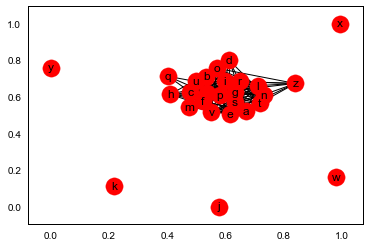

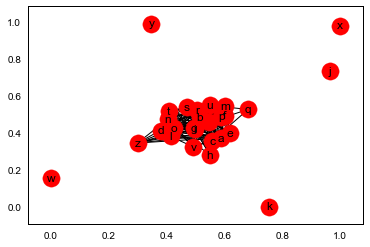

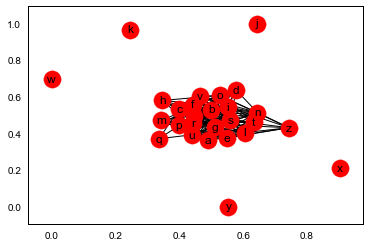

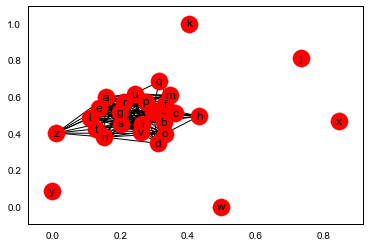

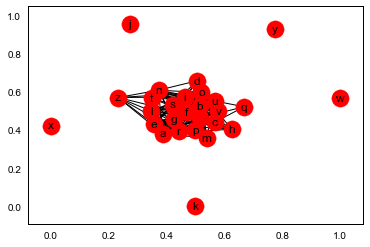

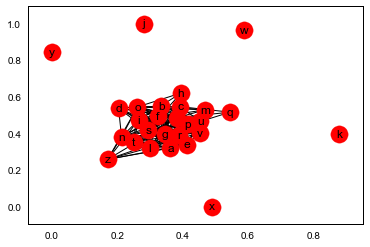

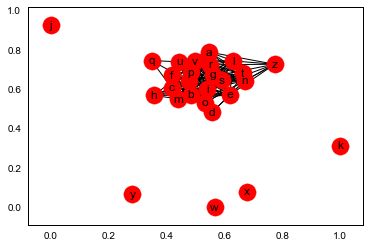

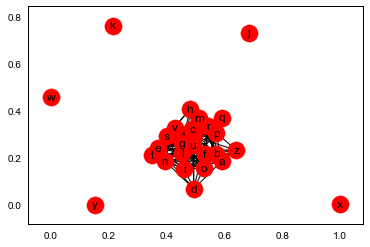

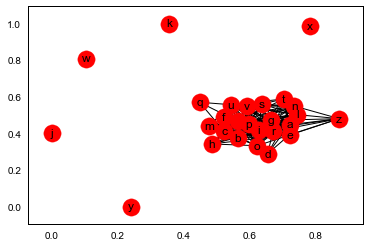

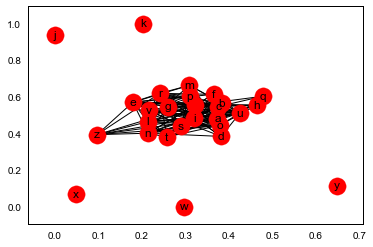

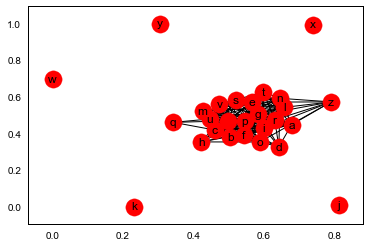

In [257]:
#%%time
import numpy as np
from scipy import misc
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

N = 50
X_it = np.zeros((N,786432))
y_it = []
for i in range(N):
    pos = nx.spring_layout(G, dim=2, k=None, pos=None, fixed=None, iterations=randint(100), weight='weight')
    sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': '0',  'xtick.color': '0','ytick.color': '0'})
    plt.figure(figsize=(6,4))
    nx.draw_networkx(G,pos)
    savefig('Image_it.png')
    img = misc.imread('Image_it.png');
    img = misc.face(gray=True)
    [width1,height1]=[img.shape[0],img.shape[1]]
    img_2 = img.reshape(width1*height1);
    X_it[i] = img_2
    y_it.append(0)
X_it

In [247]:
#file txt in input
F = open('Testo_inglese.txt', 'r')
Fh = F.readlines()

Lista = []
for n_line in range(len(Fh)):
    punctuation='!?,.:;"\')(_-{}[]1234567890*+/'
    line = Fh[n_line].translate(None, punctuation).replace('\xc3\xb9','u').replace('\xc3\xa8', 'e').replace('\u00E9', 'e').replace('\xc3\xb2','o').replace('\u00F4', 'o').replace('\xc3\xa0', 'a').replace('\n',' ').replace('\n\n',' ').replace('\xc3\xac', 'i').replace('\xc3\xa9', 'e').lower()
    for word in line:
        for letter in word:
            Lista.append(letter)

In [248]:
#creazione rete
g = nx.Graph()
alfabeto = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
g.add_nodes_from(alfabeto)

In [249]:
#creazione link
for i in range(len(Lista)-1):
    if g.edges().count((Lista[i],Lista[i+1])) == 0:
        g.add_edge(Lista[i],Lista[i+1], weight=1)
    else:
        g[Lista[i]][Lista[i+1]]['weight'] += 1 
for j in alfabeto:
    if g.edges().count(('', j)) != 0:
        g.remove_edge('', j)
if g.nodes().count(' ') != 0:
    g.remove_node(' ')
    

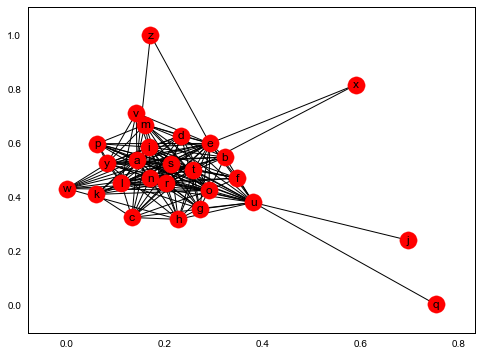

In [250]:
#visualizzazione grafica della rete inglese
pos = nx.spring_layout(g, dim=2, k=None, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plt.figure(figsize=(8,6))
nx.draw_networkx(g,pos)

In [280]:
import powerlaw as pwl
degree = np.array(g.degree().values())
fit_function = pwl.Fit(degree)
fit_function.power_law.alpha

Calculating best minimal value for power law fit


24.217325286614255

(50, 786432)

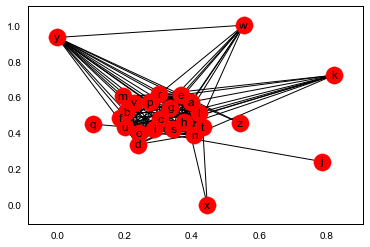

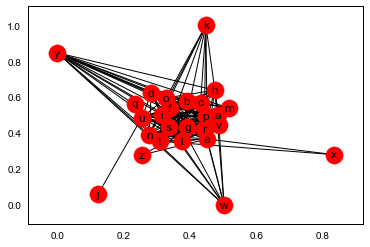

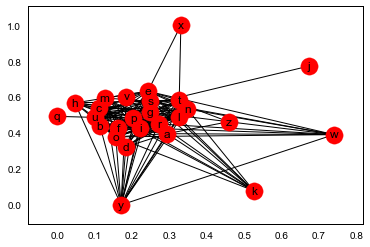

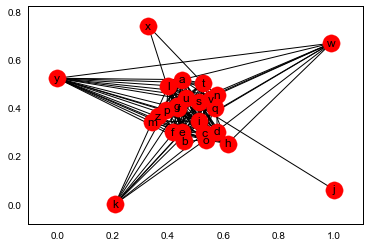

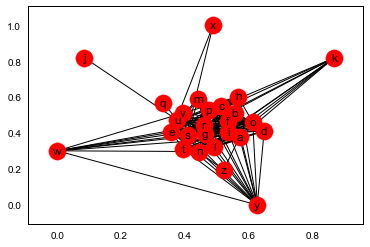

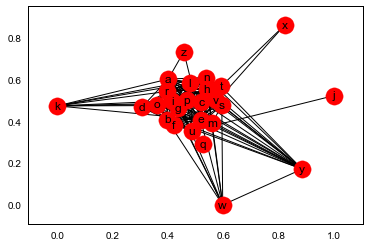

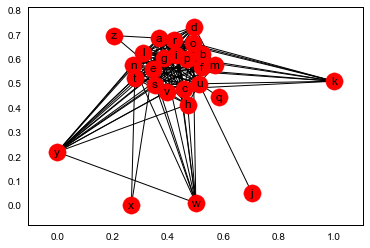

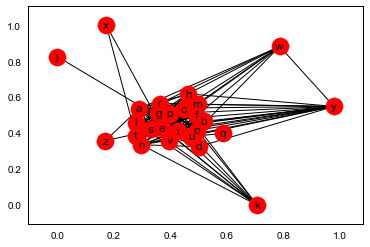

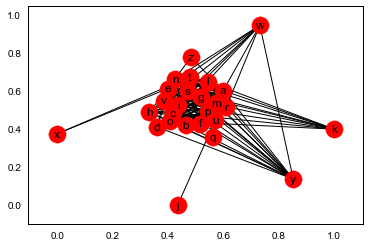

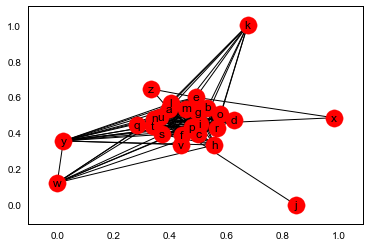

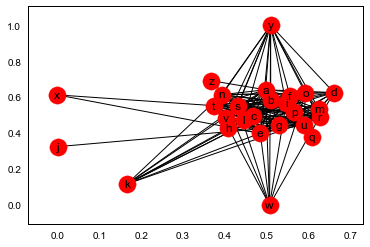

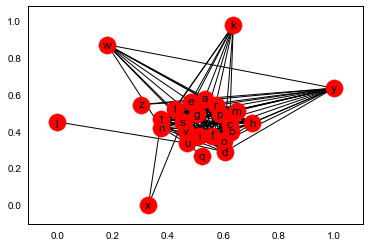

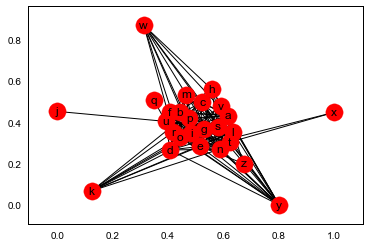

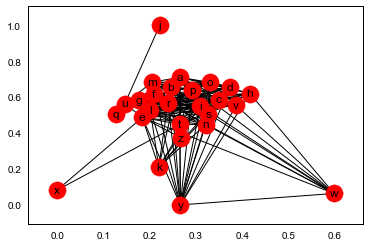

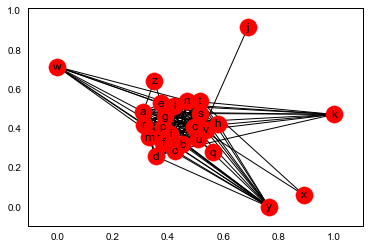

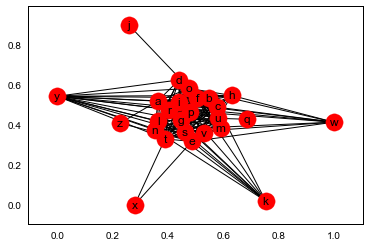

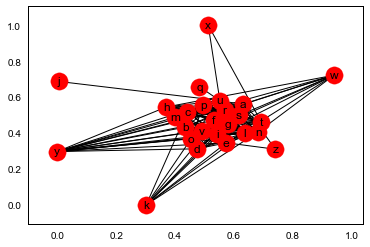

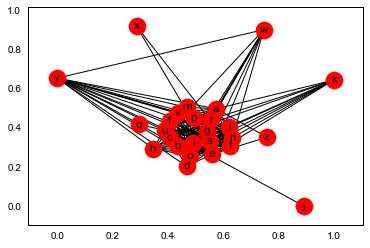

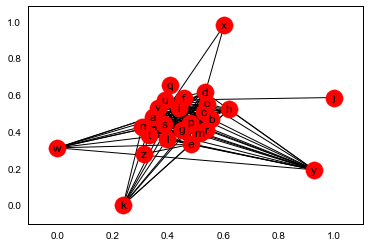

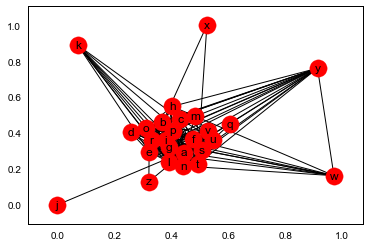

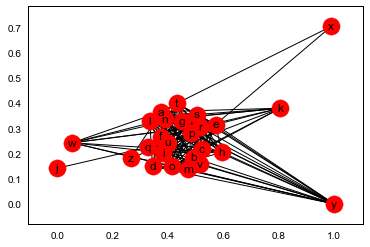

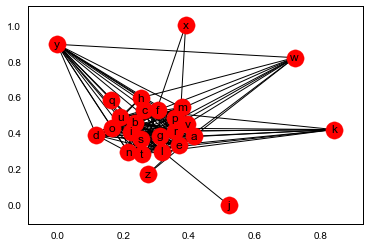

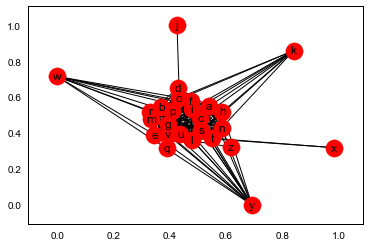

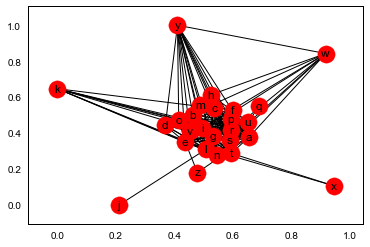

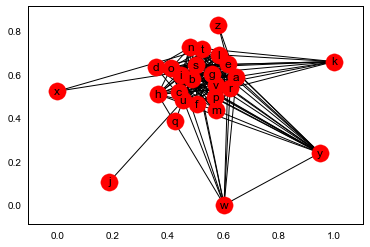

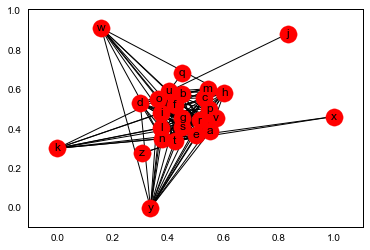

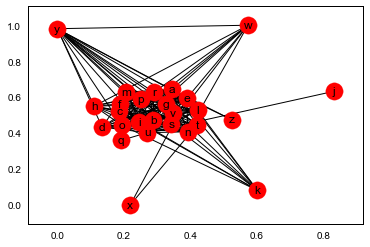

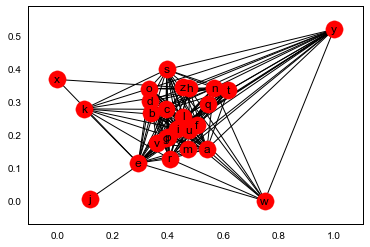

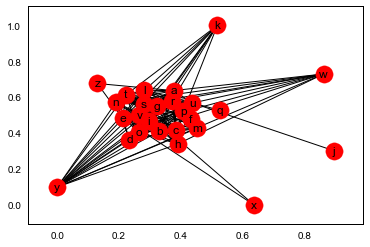

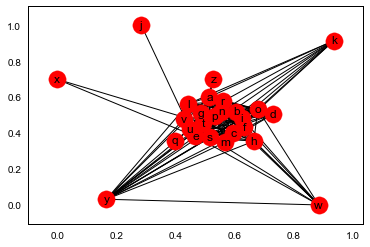

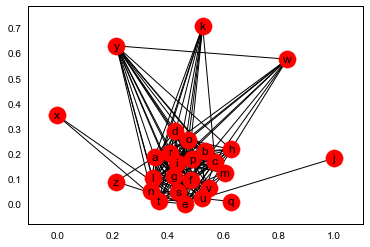

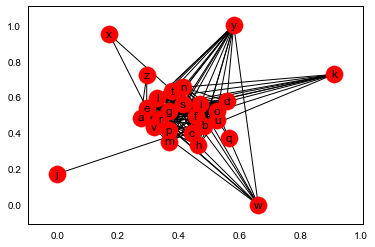

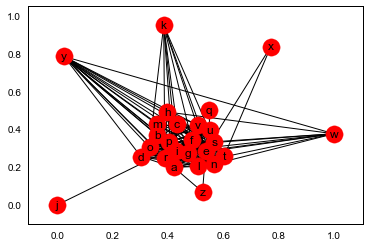

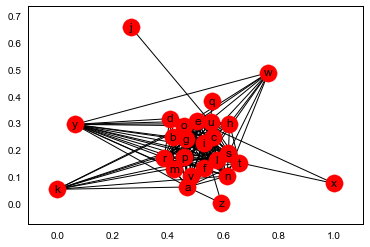

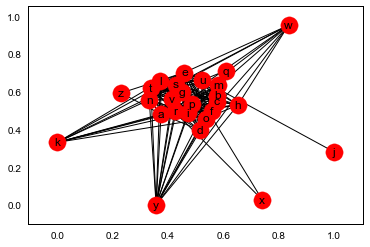

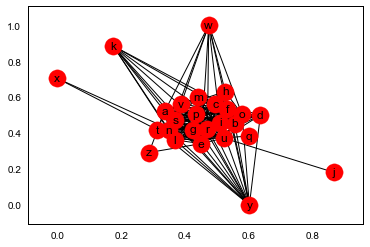

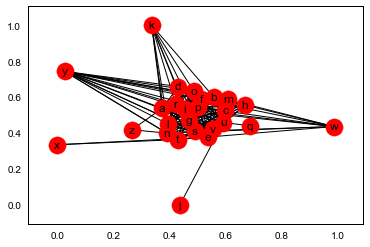

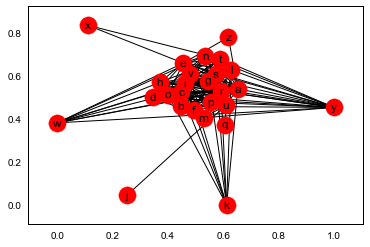

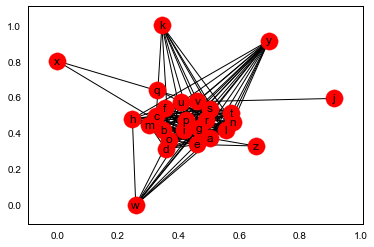

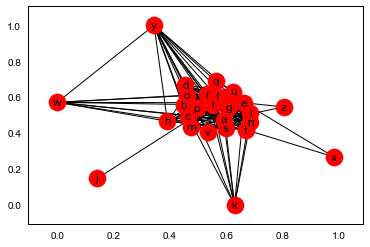

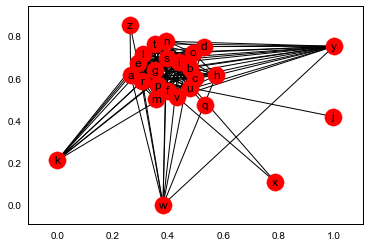

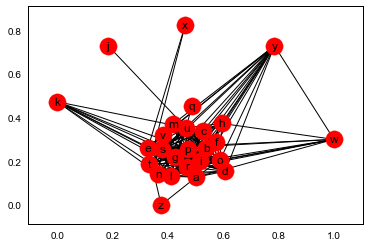

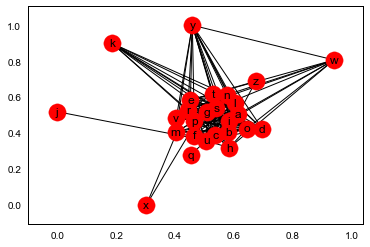

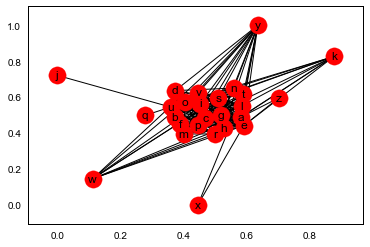

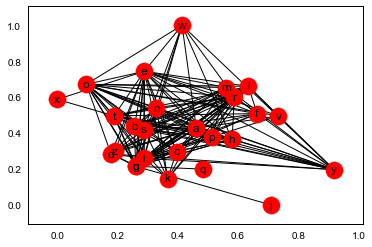

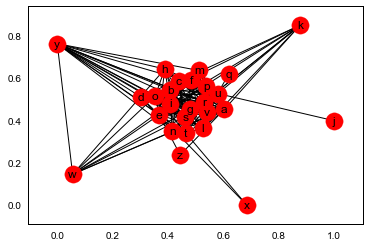

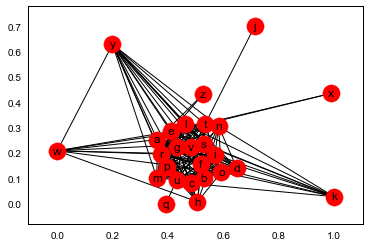

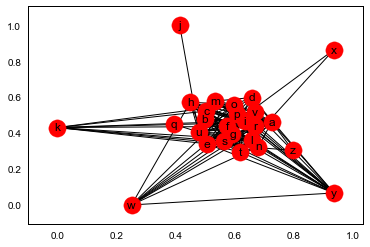

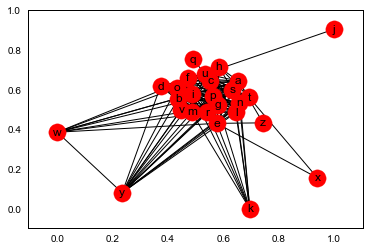

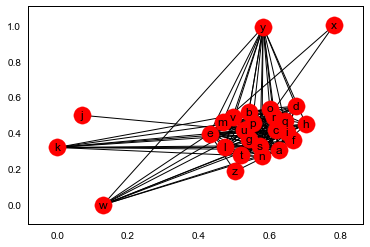

In [251]:
#%%time
import numpy as np
from scipy import misc
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_en = np.zeros((N,786432))
y_en = []
for i in range(N):
    pos = nx.spring_layout(G, dim=2, k=None, pos=None, fixed=None, iterations=randint(100), weight='weight')
    sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': '0',  'xtick.color': '0','ytick.color': '0'})
    plt.figure(figsize=(6,4))
    nx.draw_networkx(g,pos)
    savefig('Image_en.png')
    img = misc.imread('Image_en.png');
    img = misc.face(gray=True)
    [width1,height1]=[img.shape[0],img.shape[1]]
    img_2 = img.reshape(width1*height1);
    X_en[i] = img_2
    y_en.append(1)
X_en.shape

In [258]:
X = np.concatenate((X_it, X_en), axis=0)
y = np.concatenate((y_it, y_en), axis=0)

from sklearn.utils import shuffle
X_all, y_all = shuffle(X, y, random_state=42)

In [259]:
from sklearn.decomposition import PCA   
pca = PCA(800)
pca.fit(X_all)
U = pca.transform(X_all)
svm.fit(X_all,y_all)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [263]:
img = misc.imread('Image_it.png');
img = misc.face(gray=True)
[width1,height1]=[img.shape[0],img.shape[1]]
img_2 = img.reshape(width1*height1);
X_test = img_2

y_test = svm.predict(X_test)
y_test

/Users/Cinus/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

Best gamma: 1e-70
Best score: 0.5


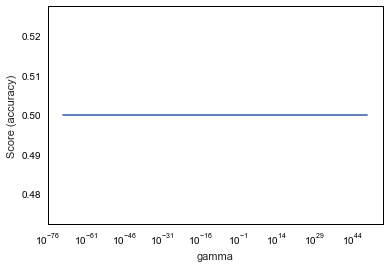

In [267]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='rbf')
gammas = np.logspace(-70, 50, 10)
scores = []
for gamma in gammas:
    svm.gamma = gamma #1500<-pti dataset, K<-pti validationset K=1500/cv, cv= <-num di suddivisioni di 1500 in K pti
    cv_scores = cross_val_score(svm, U, y_all, cv=2, n_jobs=4)#cv=3 è il numero di suddivisioni del dataset 
    #crea un vettore con tutte le accuratezze di ciascuna suddivisione possibile 
    #(i.e divido il dataset in 3 parti e una la considero validationset e calcolo lo score, poi lo calcolo considerando la parte 2 come validationset..)
    scores.append(np.mean(cv_scores))
    
print 'Best gamma:', gammas[np.argmax(scores)]
print 'Best score:', scores[np.argmax(scores)]

semilogx(gammas, scores)
plt.xlabel('gamma')
plt.ylabel('Score (accuracy)')

In [265]:
from sklearn.neural_network import MLPClassifier

model =  MLPClassifier((100,50,10),activation='relu',solver='adam', max_iter=300000000,
                                                  learning_rate='adaptive', random_state=0)

model.fit(X_all, y_all)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 10), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=300000000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [266]:
img = misc.imread('Image_it.png');
img = misc.face(gray=True)
[width1,height1]=[img.shape[0],img.shape[1]]
img_2 = img.reshape(width1*height1);
X_test = img_2

y_test = model.predict(X_test)
y_test

/Users/Cinus/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])